In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [61]:
import pandas as pd
import numpy as np 

In [29]:
data=pd.read_csv("winequalityN.csv")

In [30]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
len(data)

6497

In [32]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [33]:
data.dropna(inplace=True)
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
len(data)

6463

In [35]:
data["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [36]:
data['quality'] = data['quality'].apply(lambda x: 0 if x<=6 else 1)

In [37]:
data["quality"].value_counts()

0    5192
1    1271
Name: quality, dtype: int64

### Now this can be used as a classification problem resulting with a good sample of wine or a bad .. 
Earlier "WineQuality.ipnb" was predicting the actual quality value (1-9). 

In [38]:
x=data.drop("quality",axis=1)
y=data["quality"]
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [39]:
x=pd.get_dummies(x)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


### Lets first fit the data into linear SVC algorithm 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import svm 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [42]:
model_svc=svm.SVC()

In [43]:
model_svc.fit(x_train,y_train)

SVC()

In [44]:
model_svc.score(x_test,y_test)

0.8043310131477185

### We get an improved from our previous regression models 

In [45]:
from sklearn.model_selection import cross_val_score

In [49]:
model_svc=svm.SVC()
cross_val_score(model_svc,x,y,cv=10)

array([0.80370943, 0.80370943, 0.80216383, 0.80340557, 0.80340557,
       0.80340557, 0.80340557, 0.80340557, 0.80340557, 0.80340557])

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [51]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


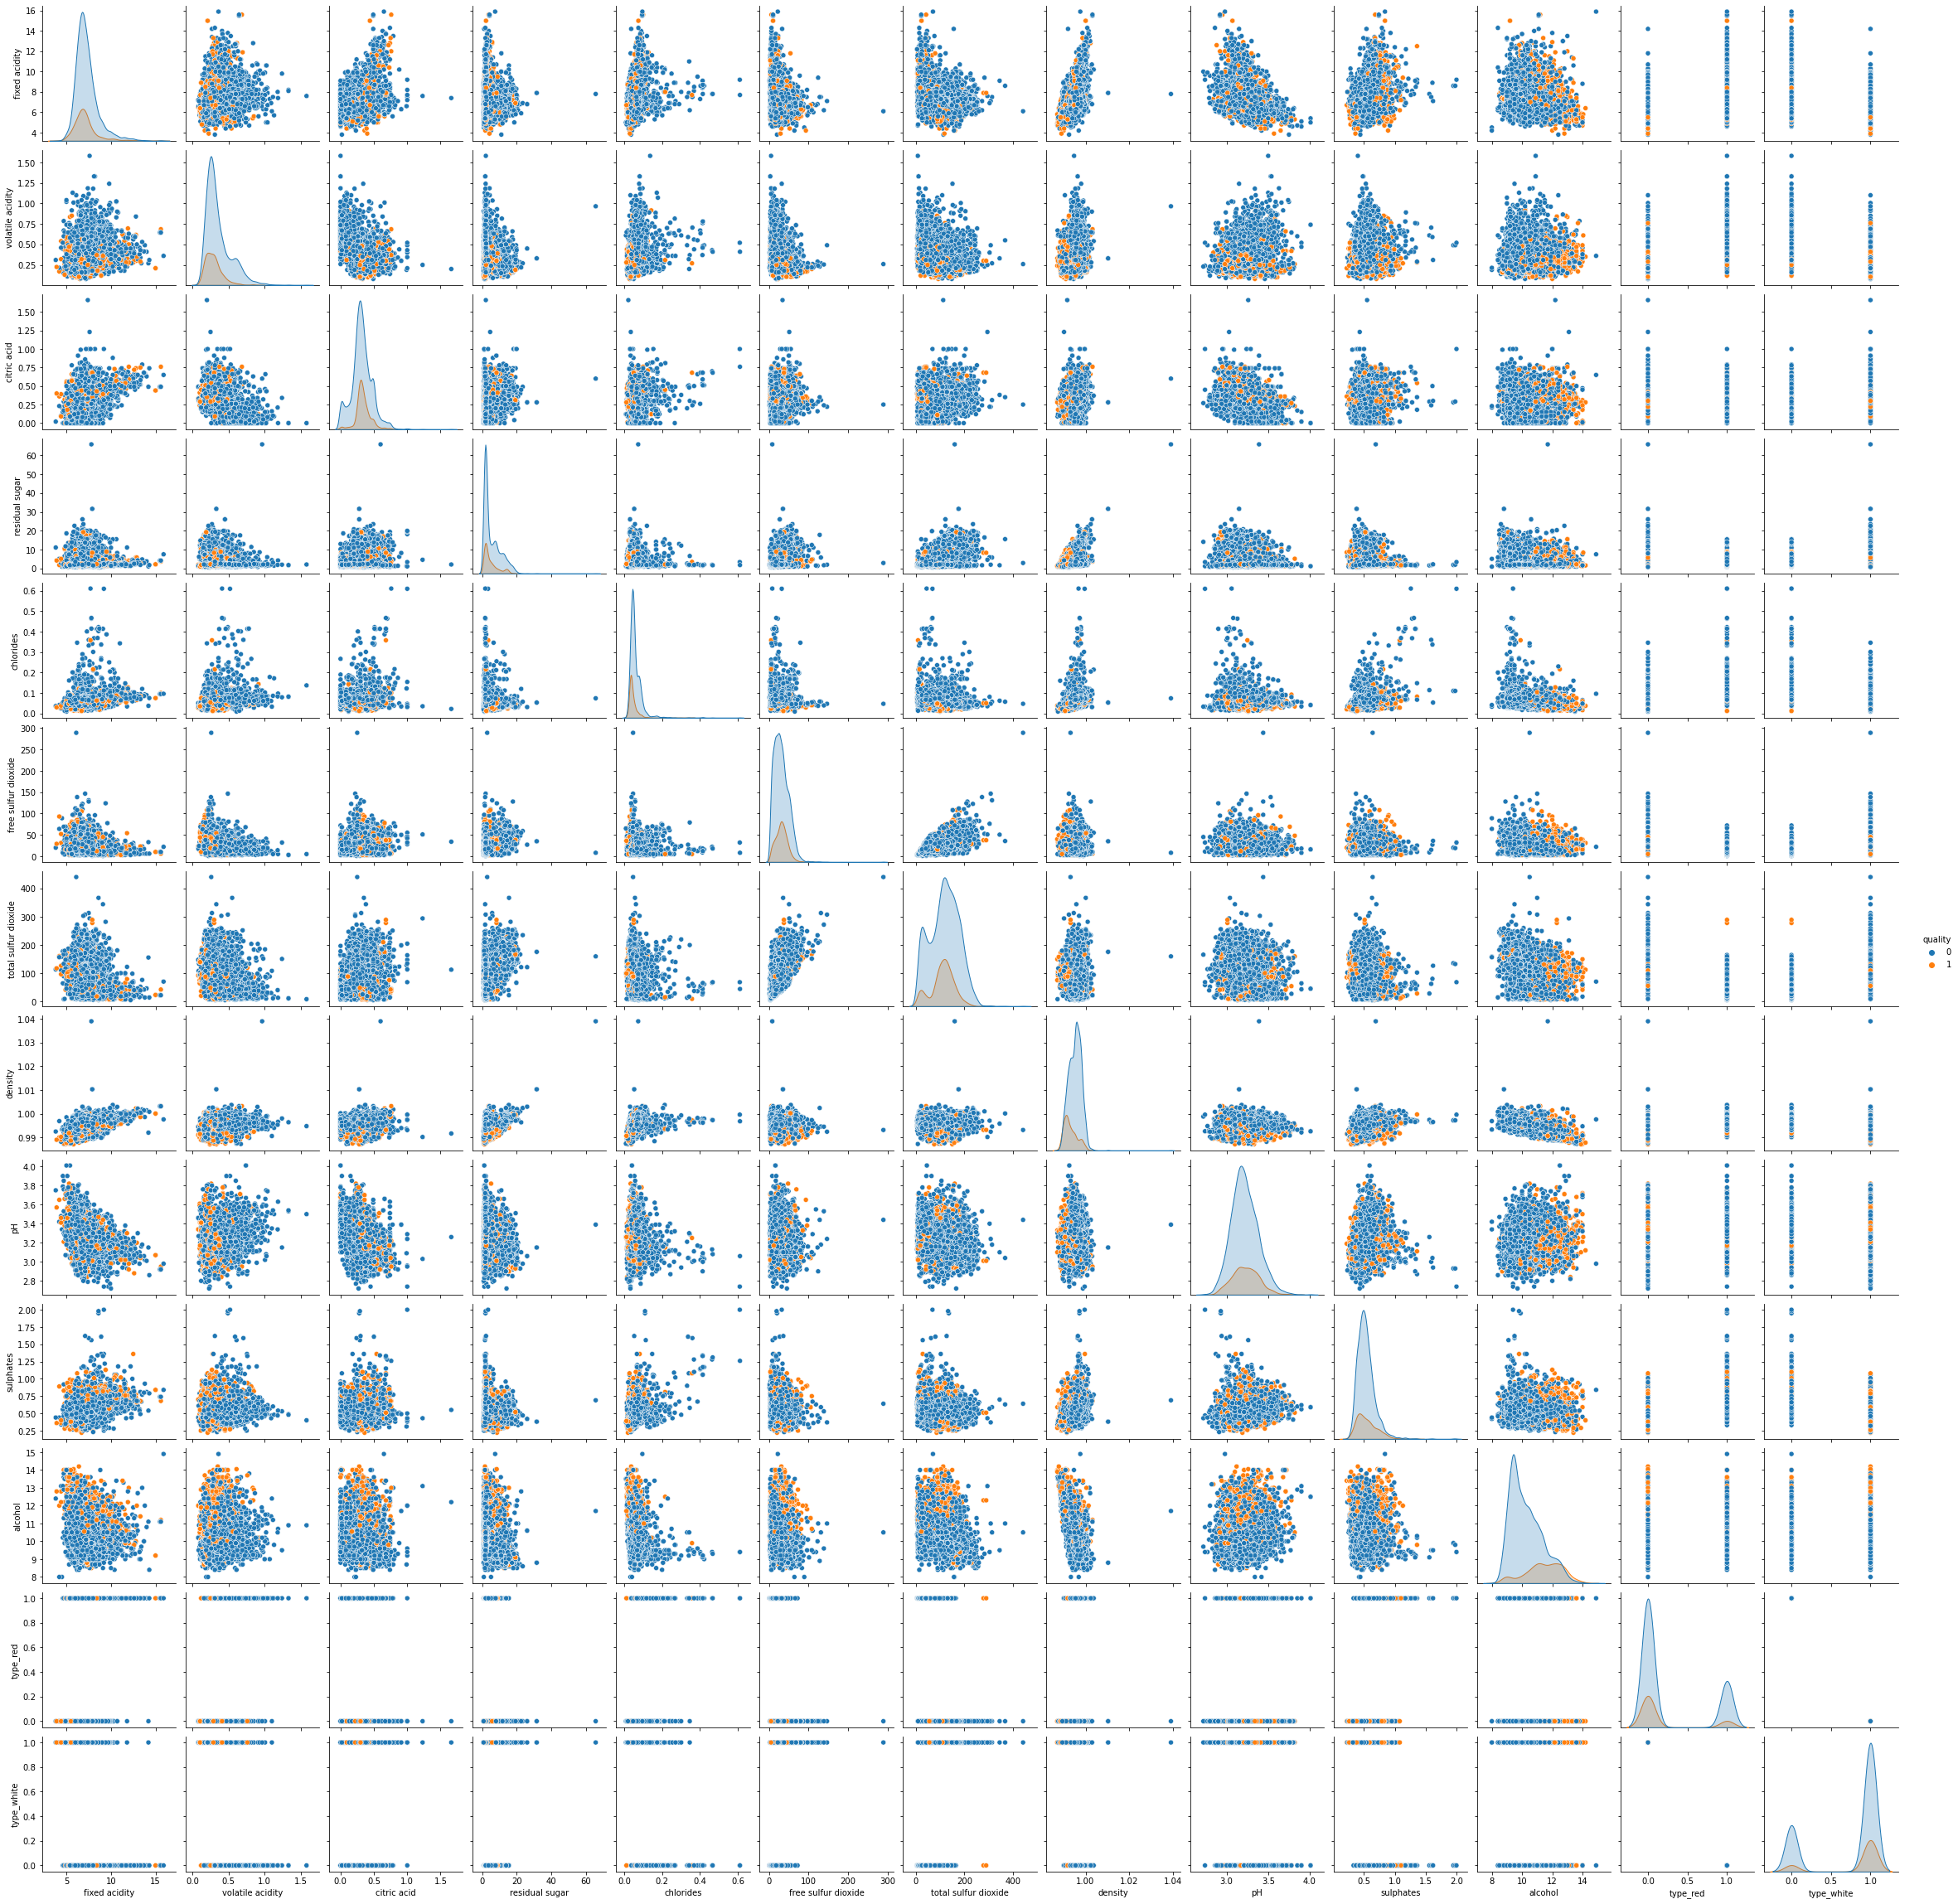

In [53]:
sns.pairplot(pd.get_dummies(data), hue ="quality" ,vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                                                          "free sulfur dioxide" ,"total sulfur dioxide","density","pH","sulphates","alcohol","type_red","type_white"] )

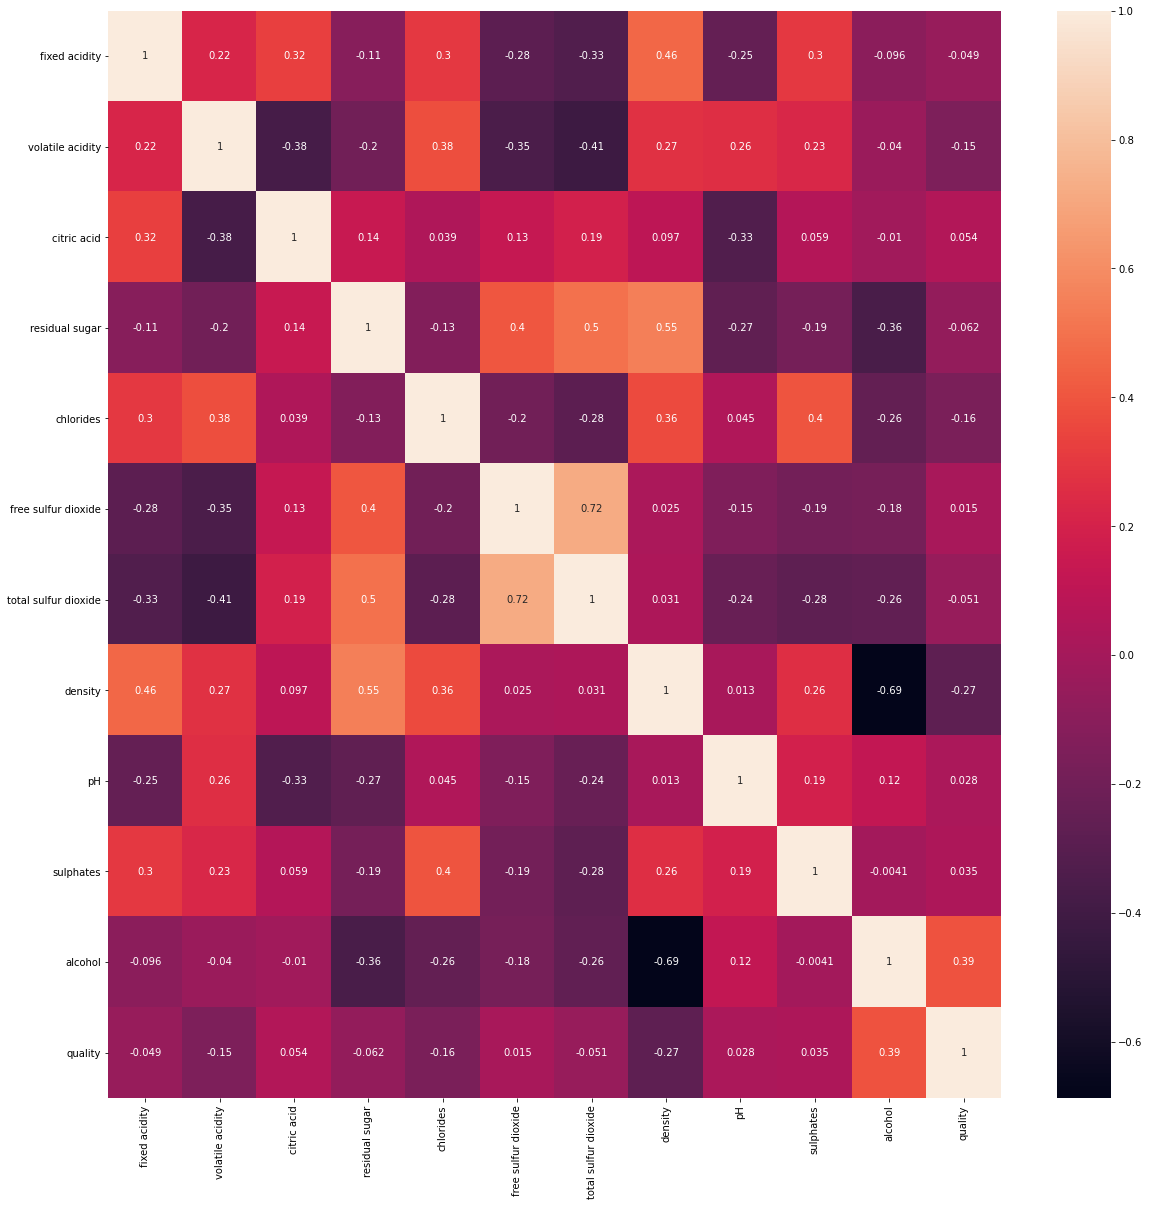

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True);

Feature-Scaling

In [64]:
x_min=x.min()
x_range=(x-x_min).max()

In [65]:
x_scaled=(x-x_min)/x_range

In [66]:
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.0,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.0,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.0,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0,1.0


In [67]:
cross_val_score(model_svc,x,y,cv=5)

array([0.80355762, 0.80355762, 0.80278422, 0.80340557, 0.80340557])

In [69]:
cross_val_score(model_svc,x_scaled,y,cv=10)

array([0.81452859, 0.8114374 , 0.812983  , 0.80959752, 0.8250774 ,
       0.80650155, 0.8250774 , 0.80959752, 0.81733746, 0.80340557])

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=5)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters={'kernel':('linear','rbf'), 'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [74]:
model_svc.fit(x_train,y_train)

SVC()

In [75]:
model_svc.score(x_test,y_test)

0.8236658932714617

In [76]:
grid=GridSearchCV(model_svc,parameters, refit=True, verbose=4 )

In [78]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.804, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.804, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.803, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.803, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.804, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.804, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.803, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.803, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.803, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.804, total=   0.2s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.803, total=   0.9s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.803, total=   1.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.803, total=   1.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.804, total=   1.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.804, total=   2.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.824, total=   0.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf')},
             verbose=4)

In [79]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [80]:
grid_pred=grid.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix ,classification_report

In [91]:
confuse=confusion_matrix(y_test,grid_pred)

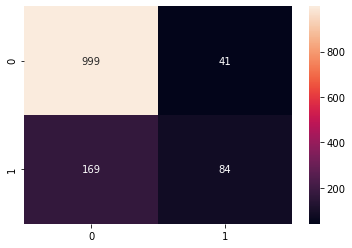

In [92]:
sns.heatmap(confuse, annot=True, fmt='g');

In [94]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1040
           1       0.67      0.33      0.44       253

    accuracy                           0.84      1293
   macro avg       0.76      0.65      0.67      1293
weighted avg       0.82      0.84      0.81      1293

